In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import pprint
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data_file = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [3]:
data_file.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def refined_df(setx):
    def refine(data):
        column_names = data.columns

        # Standardize the data
        #scaler = StandardScaler()
        #data = scaler.fit_transform(data)

        return data, column_names

    dfx, column_names = refine(setx)
    
    # Convert back to a DataFrame
    dfx = pd.DataFrame(dfx, columns=column_names)
    
    # Address class imbalance using RandomOverSampler
    oversampler = RandomOverSampler(random_state=42)
    dfx_resampled, _ = oversampler.fit_resample(dfx, dfx['quality'])  # Replace 'target_column_name' with the name of your target column

    return dfx_resampled


In [6]:
df = refined_df(data_file)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
4082,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
4083,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
4084,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4086 entries, 0 to 4085
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4086 non-null   float64
 1   volatile acidity      4086 non-null   float64
 2   citric acid           4086 non-null   float64
 3   residual sugar        4086 non-null   float64
 4   chlorides             4086 non-null   float64
 5   free sulfur dioxide   4086 non-null   float64
 6   total sulfur dioxide  4086 non-null   float64
 7   density               4086 non-null   float64
 8   pH                    4086 non-null   float64
 9   sulphates             4086 non-null   float64
 10  alcohol               4086 non-null   float64
 11  quality               4086 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 383.2 KB


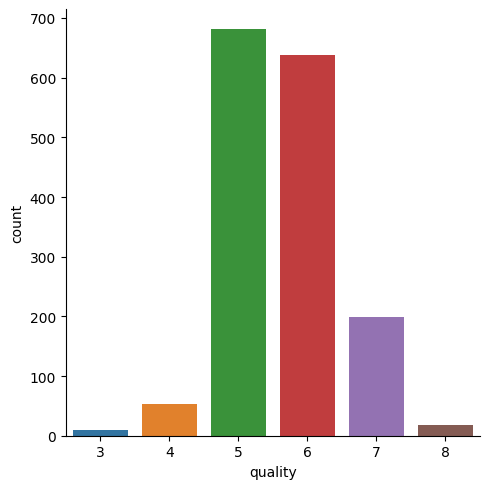

In [8]:
sns.catplot(x='quality', data = data_file, kind = 'count')
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

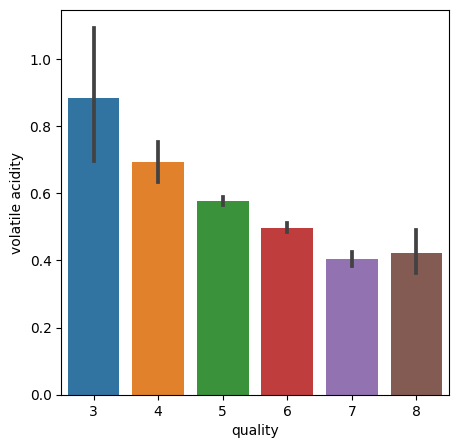

In [9]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = data_file)

<Axes: xlabel='quality', ylabel='citric acid'>

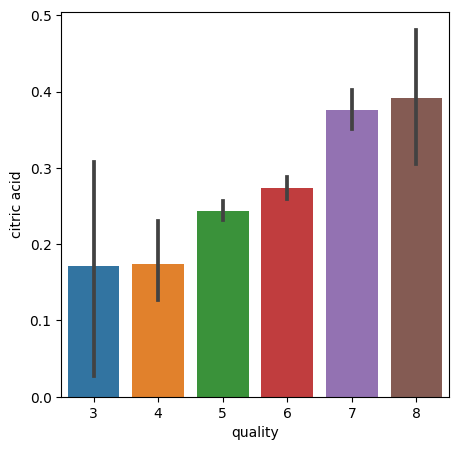

In [10]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = data_file)

In [11]:
# Convert it to a categorical variable
df['quality'] = pd.Categorical(df['quality'])

In [12]:
def random_forest_classifier(data, target_column, test_size=0.2, n_estimators=100, random_state=42):
    # Extract features (X) and target variable (y)
    X = data.drop(columns='quality')
    y = data['quality']
  
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create the RandomForestClassifier model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    confusion = confusion_matrix(y_test, predictions)
    classification_rep = classification_report(y_test, predictions, output_dict=True)

    # Create a DataFrame for the metrics
    metrics_df = pd.DataFrame({
        'Accuracy': [accuracy],
        'Confusion Matrix': [confusion],
        'Classification Report': [classification_rep]
    })

    return metrics_df, accuracy, confusion, classification_rep

# Example usage:
# metrics = evaluate_random_forest_classifier(df, 'quality')
# print(metrics)


In [13]:
metrics_df, accuracy, confusion, classification_rep = random_forest_classifier(df, 'quality')

In [14]:
accuracy

0.8875305623471883

In [15]:
classification_rep.keys()

dict_keys(['3', '4', '5', '6', '7', '8', 'accuracy', 'macro avg', 'weighted avg'])

In [16]:
 pprint.pprint(classification_rep)

{'3': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 132},
 '4': {'f1-score': 0.9886792452830189,
       'precision': 0.9776119402985075,
       'recall': 1.0,
       'support': 131},
 '5': {'f1-score': 0.7603833865814698,
       'precision': 0.7300613496932515,
       'recall': 0.7933333333333333,
       'support': 150},
 '6': {'f1-score': 0.7017543859649122,
       'precision': 0.7692307692307693,
       'recall': 0.6451612903225806,
       'support': 155},
 '7': {'f1-score': 0.9128630705394191,
       'precision': 0.88,
       'recall': 0.9482758620689655,
       'support': 116},
 '8': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 134},
 'accuracy': 0.8875305623471883,
 'macro avg': {'f1-score': 0.8939466813948034,
               'precision': 0.8928173432037547,
               'recall': 0.8977950809541465,
               'support': 818},
 'weighted avg': {'f1-score': 0.885377182306149,
                  'precision': 0.8861700927431069,
                

In [17]:
pprint.pprint(classification_rep['macro avg'])

{'f1-score': 0.8939466813948034,
 'precision': 0.8928173432037547,
 'recall': 0.8977950809541465,
 'support': 818}


Wine quality classification, the model demonstrates impressive performance. It excels in identifying extreme quality grades (3 and 8) and maintains good accuracy across the other grades (4, 5, 6, and 7). The overall model performance, as indicated by macro and weighted averages, suggests that it is well-suited for predicting wine quality within the given grade scale. However, further analysis and domain expertise may be needed to interpret the practical implications of these results in the context of wine production or evaluation.